In [36]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [37]:
df = pa.read_json("https://raw.githubusercontent.com/misode/vanilla-worldgen/master/dimension/overworld.json")

### Filter biomes

In [38]:
biomes = df["generator"]["biome_source"]["biomes"]
dfName = pa.DataFrame([b["biome"] for b in biomes], columns=["biomes"])

params = [b["parameters"] for b in biomes]
parameters = [[p["erosion"], p["depth"], p["weirdness"], p["offset"], p["temperature"], p["humidity"], p["continentalness"]] for p in params]
dfParameters = pa.DataFrame(parameters, columns=["erosion", "depth", "weirdness", "offset", "temperature", "humidity", "continentalness"])

### The dataset

In [39]:
dataset = pa.concat([dfName, dfParameters], axis=1)

In [40]:
dataset

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
0,minecraft:mushroom_fields,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[-1.2, -1.05]"
1,minecraft:mushroom_fields,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[-1.2, -1.05]"
2,minecraft:deep_frozen_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-1.05, -0.455]"
3,minecraft:deep_frozen_ocean,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-1.05, -0.455]"
4,minecraft:frozen_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-0.455, -0.19]"
...,...,...,...,...,...,...,...,...
7573,minecraft:desert,"[0.45, 0.55]",1.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
7574,minecraft:desert,"[0.55, 1.0]",0.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.19, -0.11]"
7575,minecraft:desert,"[0.55, 1.0]",1.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.19, -0.11]"
7576,minecraft:dripstone_caves,"[-1.0, 1.0]","[0.2, 0.9]","[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[0.8, 1.0]"


### Get biomes list

In [41]:
bName = dataset["biomes"].drop_duplicates()
print(len(bName))
bName

50


0                minecraft:mushroom_fields
2              minecraft:deep_frozen_ocean
4                   minecraft:frozen_ocean
6                minecraft:deep_cold_ocean
8                     minecraft:cold_ocean
10                    minecraft:deep_ocean
12                         minecraft:ocean
14           minecraft:deep_lukewarm_ocean
16                minecraft:lukewarm_ocean
18                    minecraft:warm_ocean
22                   minecraft:stony_shore
24                         minecraft:swamp
26                  minecraft:snowy_slopes
32                  minecraft:snowy_plains
42                   minecraft:snowy_beach
50      minecraft:windswept_gravelly_hills
86                         minecraft:grove
110              minecraft:windswept_hills
122                  minecraft:snowy_taiga
140             minecraft:windswept_forest
152                        minecraft:taiga
178                       minecraft:plains
180                       minecraft:meadow
192        

### Give color to some biome

In [42]:
bName = np.array(["minecraft:savanna", "minecraft:plains", "minecraft:ocean", "minecraft:warm_ocean", "minecraft:mushroom_fields", "minecraft:desert"])
def getBiomeColor(name):
  colors = ['r','g','b','c','m','yellow']
  symbols = [1,2,3,4,8,12]
  i = np.where(bName == name)[0]

  if i >= len(colors) or len(i) == 0:
    return ("purple", 19)
  return (colors[int(i)], symbols[int(i)])

In [43]:
def showVec(ds, vecName):
  X = [t[0] for t in ds[vecName]]
  Y = [t[1] for t in ds[vecName]]
  colors = [getBiomeColor(b)[0] for b in ds["biomes"]]
  plt.scatter(X, Y, c=colors, alpha=0.4)

In [156]:
nameSelect = ["minecraft:savanna ", "minecraft:plains ", "minecraft:ocean ",
              "minecraft:warm_ocean ", "minecraft:mushroom_fields ", "minecraft:desert"]
bNameSelect = [any(b == bn for bn in nameSelect) for b in dataset["biomes"]]

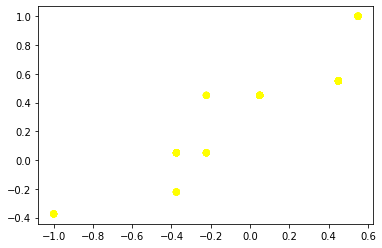

In [157]:
showVec(dataset[bNameSelect], "erosion")

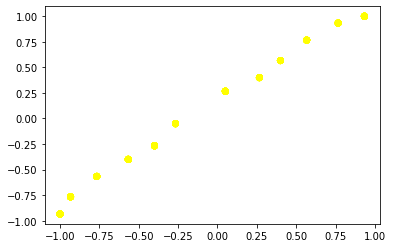

In [158]:
showVec(dataset[bNameSelect], "weirdness")

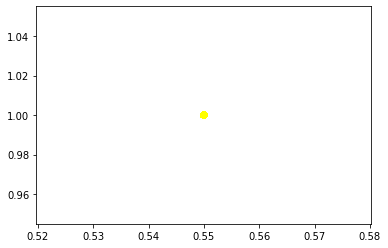

In [159]:
showVec(dataset[bNameSelect], "temperature")

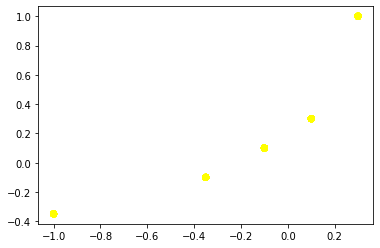

In [160]:
showVec(dataset[bNameSelect], "humidity")

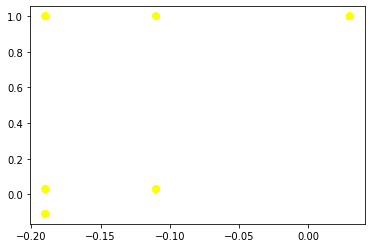

In [161]:
showVec(dataset[bNameSelect], "continentalness")

## Test with desert

In [162]:
desert = dataset[dataset["biomes"] == "minecraft:desert"]
desert

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
602,minecraft:desert,"[-0.375, -0.2225]",0.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[-0.11, 0.03]"
603,minecraft:desert,"[-0.375, -0.2225]",1.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[-0.11, 0.03]"
608,minecraft:desert,"[-0.2225, 0.05]",0.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[-0.19, 0.03]"
609,minecraft:desert,"[-0.2225, 0.05]",1.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[-0.19, 0.03]"
612,minecraft:desert,"[0.05, 0.45]",0.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[-0.19, -0.11]"
...,...,...,...,...,...,...,...,...
7571,minecraft:desert,"[0.45, 0.55]",1.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.11, 0.03]"
7572,minecraft:desert,"[0.45, 0.55]",0.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
7573,minecraft:desert,"[0.45, 0.55]",1.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
7574,minecraft:desert,"[0.55, 1.0]",0.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.19, -0.11]"


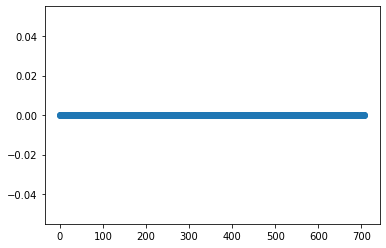

In [163]:
import matplotlib.pyplot as plt

X = np.linspace(0, len(desert)-1, len(desert))
plt.scatter(X, desert["offset"])

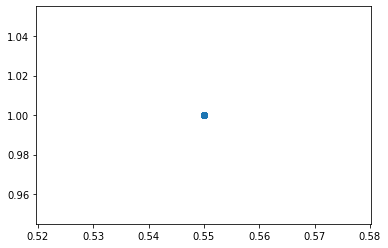

In [164]:
X = [t[0] for t in desert["temperature"]]
Y = [t[1] for t in desert["temperature"]]
plt.scatter(X, Y)